In [1]:
!wget https://raw.githubusercontent.com/FernandoV17/IA_VERANOS/refs/heads/main/ACT2/DATA/diabetes.csv

--2025-07-03 04:30:28--  https://raw.githubusercontent.com/FernandoV17/IA_VERANOS/refs/heads/main/ACT2/DATA/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23105 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  22.56K  --.-KB/s    in 0.001s  

2025-07-03 04:30:28 (21.3 MB/s) - ‘diabetes.csv’ saved [23105/23105]



In [2]:
#Si Clonaste el Respositorio
data_path = '/content/IA_VERANOS/ACT2/DATA/diabetes.csv'

In [3]:
#Si nada mas usas google collab
data_path = '/content/diabetes.csv'

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

Part 1

In [5]:
df = pd.read_csv(data_path)

In [6]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [7]:
df_processed = df.copy()

In [8]:
key_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in key_columns:
    if df_processed[col].isin([0]).any():
        non_zero_vals = df_processed[col][df_processed[col] != 0]
        median = np.median(non_zero_vals)
        df_processed[col] = np.where(df_processed[col] == 0, median,

Glucose: 5 zero values, 0 null values
BloodPressure: 35 zero values, 0 null values
SkinThickness: 227 zero values, 0 null values
Insulin: 374 zero values, 0 null values
BMI: 11 zero values, 0 null values


In [9]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

Part 2

In [10]:
numeric_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()
print("Columnas numéricas identificadas:", numeric_cols)

df_clean = df.copy()

for col in numeric_cols:
    col_median = df_clean[df_clean[col] != 0][col].median()
    # Replace zeros with median
    df_clean[col] = df_clean[col].replace(0, col_median)

    print(f"Replaced zeros in {col} with median value: {col_median:.2f}")

Columnas numéricas identificadas: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Replaced zeros in Pregnancies with median value: 4.00
Replaced zeros in Glucose with median value: 117.00
Replaced zeros in BloodPressure with median value: 72.00
Replaced zeros in SkinThickness with median value: 29.00
Replaced zeros in Insulin with median value: 125.00
Replaced zeros in BMI with median value: 32.30
Replaced zeros in DiabetesPedigreeFunction with median value: 0.37
Replaced zeros in Age with median value: 29.00
Replaced zeros in Outcome with median value: 1.00


In [11]:
numeric_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()
print("Columnas numéricas identificadas:", numeric_cols)

scaler = MinMaxScaler()

df_clean[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])

print("\nFirst few rows after preprocessing:")
print(df_clean.head())

print("\nDescriptive statistics after preprocessing:")
print(df_clean.describe())

Columnas numéricas identificadas: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

First few rows after preprocessing:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.3125  0.670968       0.489796       0.304348  0.133413  0.314928   
1       0.0000  0.264516       0.428571       0.239130  0.133413  0.171779   
2       0.4375  0.896774       0.408163       0.239130  0.133413  0.104294   
3       0.0000  0.290323       0.428571       0.173913  0.096154  0.202454   
4       0.1875  0.600000       0.163265       0.304348  0.185096  0.509202   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333      0.0  
1                  0.116567  0.166667      0.0  
2                  0.253629  0.183333      0.0  
3                  0.038002  0.000000      0.0  
4                  0.943638  0.200000      0.0  

Descriptive statistics after preprocessi

Parte 3

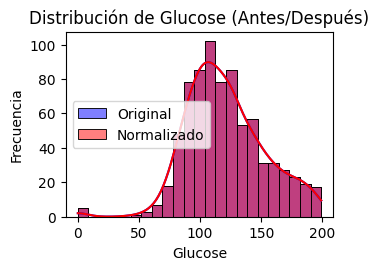

In [12]:
#Histograma
plt.subplot(2, 2, 1)
sns.histplot(df['Glucose'], kde=True, color='blue', label='Original', alpha=0.5)
sns.histplot(df_processed['Glucose'], kde=True, color='red', label='Normalizado', alpha=0.5)
plt.title('Distribución de Glucose (Antes/Después)')
plt.xlabel('Glucose')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()
plt.show()

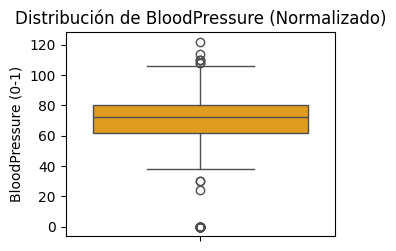

In [17]:
#Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(y=df_processed['BloodPressure'], color='orange')
plt.title('Distribución de BloodPressure (Normalizado)')
plt.ylabel('BloodPressure (0-1)')
plt.tight_layout()
plt.show()

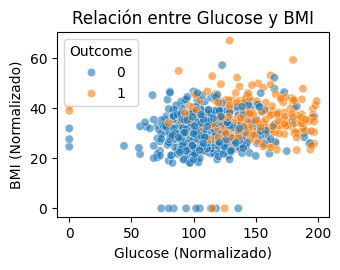

In [14]:
#Scatter
plt.subplot(2, 2, 3)
sns.scatterplot(x=df_processed['Glucose'], y=df_processed['BMI'], hue=df_processed['Outcome'], alpha=0.6)
plt.title('Relación entre Glucose y BMI')
plt.xlabel('Glucose (Normalizado)')
plt.ylabel('BMI (Normalizado)')
plt.tight_layout()
plt.show()

/tmp/ipython-input-15-2488075626.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette=['green', 'red'])


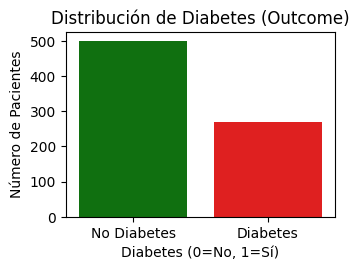

In [15]:
#Bar Chart patients vs diabetes
plt.subplot(2, 2, 4)
outcome_counts = df['Outcome'].value_counts()
sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette=['green', 'red'])
plt.title('Distribución de Diabetes (Outcome)')
plt.xlabel('Diabetes (0=No, 1=Sí)')
plt.ylabel('Número de Pacientes')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.tight_layout()
plt.show()